# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Импорт необходимых библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier

## Изучение датасета

In [2]:
data = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Введение в ML/users_behavior.csv')
data.sample(5)

,calls,minutes,messages,mb_used,is_ultra
975,11.0,106.75,31.0,17631.06,0
611,99.0,690.04,62.0,19128.75,0
2952,28.0,202.91,37.0,7723.30,0
1030,85.0,621.93,46.0,16743.65,1
375,81.0,533.34,0.0,8609.95,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


### Вывод

В данных 5 колонок (5 признаков): <br>

**calls minutes messages mb_used** - признаки по которым будем обучать модели;<br>
**is_ultra** - целевой признак.<br>

Целевой признак категориальный, значит решаем задачу классификации, а так как категорий всего две, значит будет идти речь о бинарной классификации.

Данные без пропусков, предобрабатывать нет необходимости.

## Разбивка данных на выборки

### Разбивка данных на обучающую, валидационную и тестовую выборки

Обучающую выборку обучно берут в размере не менее 60% от данных, а тестовая и валидационная обычно берутся равными, поэтому разделим следующим образом:

Обучающая -60% <br>
Тестовая - 20% <br>
Валидационная - 20% <br>

In [4]:
data_train, data_valid = train_test_split(data, test_size=0.40, random_state=12345)
data_valid, data_test = train_test_split(data_valid, test_size=0.50, random_state=12345)

In [5]:
print('Размер обучающей выборки:', data_train.shape)
print('Размер валидационной выборки:', data_valid.shape)
print('Размер тестовой выборки:', data_test.shape)

Размер обучающей выборки: (1928, 5)
Размер валидационной выборки: (643, 5)
Размер тестовой выборки: (643, 5)


### Отделяем целевой признак от остальных

In [6]:
data_train_target = data_train['is_ultra']
data_train_features = data_train.drop(['is_ultra'], axis=1)

In [7]:
data_valid_target = data_valid['is_ultra']
data_valid_features = data_valid.drop(['is_ultra'], axis=1)

In [8]:
data_test_target = data_test['is_ultra']
data_test_features = data_test.drop(['is_ultra'], axis=1)

## Исследование модели

### Классификация деревом решений

In [9]:
best_accuracy_DecisionTree = 0
best_model_DecisionTree = None
max_depth_best = 0
for depth in range (1,7):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(data_train_features, data_train_target)
    answers = model.predict(data_valid_features)
    accuracy = accuracy_score(data_valid_target, answers)
    if accuracy > best_accuracy_DecisionTree:
        best_accuracy_DecisionTree = accuracy
        best_model_DecisionTree = model
        max_depth_best = depth
        
print('Лучший результат:', best_accuracy_DecisionTree)
print('Соответствует дереву с максимальной глубиной:', max_depth_best)

Лучший результат: 0.7853810264385692
Соответствует дереву с максимальной глубиной: 3


#### Попробуем изменить гиперпарамтры: criterion, min_samples_split, min_samples_leaf

**criterion** - критерий разделения <br>
**min_samples_split** - минимальное число объектов в узле дерева, достаточное для дальнейшего разделения<br>
**min_samples_leaf** - минимальное число объектов в листьях дерева - нижних узлах с ответами<br>

Максимальную глубину примем равную трём (max_depth_best)

P.S. эти параметры упоминались в тренажере, но не пояснялись на практике

In [10]:
model = DecisionTreeClassifier(criterion='entropy', random_state=12345, max_depth=max_depth_best) #default - "gini"
model.fit(data_train_features, data_train_target)
answers = model.predict(data_valid_features)
accuracy = accuracy_score(data_valid_target, answers)
    
if accuracy == best_accuracy_DecisionTree:
    print('Модель не улучшилась изменяя параметр criterion')

Модель не улучшилась изменяя параметр criterion


In [11]:
min_samples_split_best = 2 #2-default
best_model_DecisionTree_1 = None
for min_samples_split in range (2,7):
    model = DecisionTreeClassifier(random_state=12345, min_samples_split=min_samples_split, max_depth=max_depth_best)
    model.fit(data_train_features, data_train_target)
    answers = model.predict(data_valid_features)
    accuracy = accuracy_score(data_valid_target, answers)
    if accuracy > best_accuracy_DecisionTree:
        best_accuracy_DecisionTree = accuracy
        best_model_DecisionTree_1 = model
        min_samples_split_best = min_samples_split
        
if min_samples_split_best == 2:
    print('Модель не улучшилась переберая параметр min_samples_split')

Модель не улучшилась переберая параметр min_samples_split


In [12]:
min_samples_leaf_best = 1 #1-default
for min_samples_leaf in range (1, 5):
    model = DecisionTreeClassifier(random_state=12345, min_samples_leaf=min_samples_leaf, max_depth=max_depth_best)
    model.fit(data_train_features, data_train_target)
    answers = model.predict(data_valid_features)
    accuracy = accuracy_score(data_valid_target, answers)
    if accuracy > best_accuracy_DecisionTree:
        best_accuracy_DecisionTree = accuracy
        best_model_DecisionTree_1 = model
        min_samples_leaf_best = min_samples_split

if min_samples_leaf_best == 1:
    print('Модель не улучшилась переберая параметр min_samples_leaf')

Модель не улучшилась переберая параметр min_samples_leaf


### Классификация логистической регрессией

In [13]:
model_LogisticRegression = LogisticRegression(random_state=12345)
model_LogisticRegression.fit(data_train_features, data_train_target)
answers = model_LogisticRegression.predict(data_valid_features)
accuracy = accuracy_score(data_valid_target, answers)

print('Результат:', accuracy)

Результат: 0.7107309486780715


### Классификация случайным лесом

In [14]:
best_accuracy_RandomForest = 0
best_model_RandomForest = None
est_best = 0
for est in range(1,10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(data_train_features, data_train_target)
    answers = model.predict(data_valid_features)
    accuracy = accuracy_score(data_valid_target, answers)
    
    if accuracy > best_accuracy_RandomForest:
        best_accuracy_RandomForest = accuracy
        best_model_RandomForest = model
        est_best = est
        
print('Лучший результат:', best_accuracy_RandomForest)
print('Соответствует параметру n_estimators равному:', est_best)

Лучший результат: 0.7822706065318819
Соответствует параметру n_estimators равному: 8


### Вывод

Просмотрены три способа классификации <br>

Лучший результат на валидационной выборке у классификации **деревом решений**: 0.7853810264385692 (max_depth=3) <br>
Затем у классификации **случайным лесом**: 0.7822706065318819 (n_estimators=8)  <br>
И хуже всех справилась **логистическая регрессия**: 0.7107309486780715 <br>

## Проверка модель на тестовой выборке

In [15]:
answers_DecisionTree = best_model_DecisionTree.predict(data_test_features)
accuracy_DecisionTree = accuracy_score(data_test_target, answers_DecisionTree)

print('Точность дерева решений:', accuracy_DecisionTree)

Точность дерева решений: 0.7791601866251944


### Вывод

Модель прошла проверку на тестовой выборке, точность получилась около 78%, что нас удовлетворяет 

## (бонус) Проверка модели на адекватность

In [16]:
dummy = DummyClassifier(strategy='most_frequent').fit(data_train_features, data_train_target)
dummy_pred = dummy.predict(data_test_features)
accuracy = accuracy_score(data_test_target, dummy_pred)
print(accuracy)

0.6842923794712286


Не очень понял задания, к примеру, можно сказать, что если бы мы ответы заполнили рандомными данными, то точность была бы близкой к 0.5, поэтому наш результат внушает доверие.<br>

Но чтобы не оставлять этот пункт пустым, рассмотрю метрику roc-auc для двоичной классификации.<br>

Вычитал, что площадь под кривой ROC – хорошая метрика для оценки модели классификации


Немного из обозначений: <br>
True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.<br>
TPR = TP / (TP + FN).

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.<br>
FPR = FP / (FP + TN).

Кривая ROC создается определенным образом, по-сложному, поэтому описывать здесь не буду.

Синяя пунктирная линия показывает кривую TPR и FPR при случайном определении positive или negative для каждого случая. Для этой диагональной линии площадь под кривой (AUC) составляет 0.5.

Чем больше охватываемая область, тем лучше модели машинного обучения различают классы. То есть, чем больше площадь фигуры ограниченной оранжевой и пунктирной линиями - тем лучше модель. Только это с учетом того, что оранжевая находится сверху пунктирной.

In [17]:
def plot_ROC_AUC(answers, model):
    answers = model.predict_proba(data_test_features)
    answers = answers[:, 1]
    
    lr_auc = roc_auc_score(data_test_target, answers)
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    
    fpr, tpr, treshold = roc_curve(data_test_target, answers)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

LogisticRegression: ROC AUC=0.699


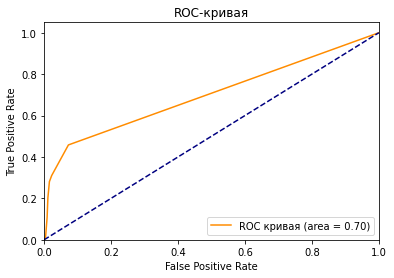

In [18]:
plot_ROC_AUC(answers_DecisionTree, best_model_DecisionTree)

LogisticRegression: ROC AUC=0.445


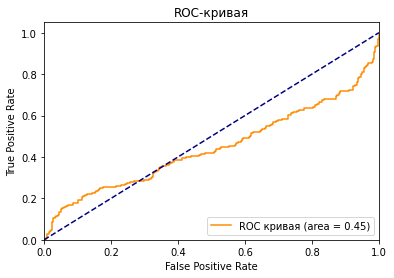

In [19]:
answers_LogisticRegression = model_LogisticRegression.predict(data_test_features)

plot_ROC_AUC(answers_LogisticRegression, model_LogisticRegression)

LogisticRegression: ROC AUC=0.796


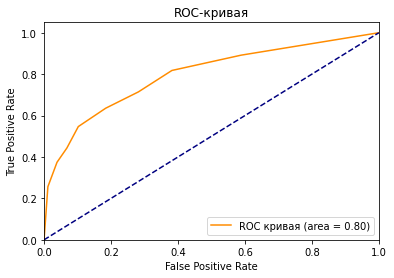

In [20]:
answers_RandomForest = best_model_RandomForest.predict(data_test_features)

plot_ROC_AUC(answers_RandomForest, best_model_RandomForest)